# Bank Failures and Assistance Data - Exploring Relationships

#### Table Of Contents

## 1. Importing Libraries

## 2. DataFrame Information

## 3. Exploring Relationships

### 3a. Correlation matrix and Heatmap

### 3b. Scatterplots

### 3c. Pair Plots

### 3d. Categorical Plots

## 4. Questions & Hypotheses

## 5. DataSet Wishlist

#### Main Body

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction'

In [3]:
df = pd.read_csv(os.path.join(path, 'Datasets', 'Prepared Data', 'DS8_BankSuite_Failures_1934-2023_clean.csv'), index_col = False)

## 2. DataFrame Information

In [4]:
df.shape

(3468, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3468 non-null   int64  
 1   Certification     3468 non-null   float64
 2   Charter Class     3468 non-null   object 
 3   City              3468 non-null   object 
 4   State             3468 non-null   object 
 5   Estimated Loss    3468 non-null   float64
 6   Failure Date      3468 non-null   object 
 7   FIN               3468 non-null   int64  
 8   ID                3468 non-null   int64  
 9   Bank Name         3468 non-null   object 
 10  Total Assets      3468 non-null   float64
 11  Total Deposits    3468 non-null   float64
 12  Resolution        3468 non-null   object 
 13  Transaction Type  3468 non-null   object 
 14  Insurance Fund    3468 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 406.5+ KB


In [6]:
#Changing datatypes
df['Certification'] = df['Certification'].astype('str')
df['Failure Date'] = df['Failure Date'].astype('datetime64[ns]')
df['FIN'] = df['FIN'].astype('str')
df['ID'] = df['ID'].astype('str')

In [7]:
#Drop Unnecessary columns
df_clean = df.drop(columns = ['Unnamed: 0'])

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Certification     3468 non-null   object        
 1   Charter Class     3468 non-null   object        
 2   City              3468 non-null   object        
 3   State             3468 non-null   object        
 4   Estimated Loss    3468 non-null   float64       
 5   Failure Date      3468 non-null   datetime64[ns]
 6   FIN               3468 non-null   object        
 7   ID                3468 non-null   object        
 8   Bank Name         3468 non-null   object        
 9   Total Assets      3468 non-null   float64       
 10  Total Deposits    3468 non-null   float64       
 11  Resolution        3468 non-null   object        
 12  Transaction Type  3468 non-null   object        
 13  Insurance Fund    3468 non-null   object        
dtypes: datetime64[ns](1), fl

## 3. Exploring Relationships

### 3a. Correlation Matrix and Heatmap

In [9]:
#Creating a correlation matrix between qualitative variables
df_clean.corr()

C:\Users\Dallas\AppData\Local\Temp\ipykernel_2272\1820872185.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,Estimated Loss,Total Assets,Total Deposits
Estimated Loss,1.000000,0.470933,0.537625
Total Assets,0.470933,1.000000,0.988274
Total Deposits,0.537625,0.988274,1.000000


C:\Users\Dallas\AppData\Local\Temp\ipykernel_2272\3524723943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_clean.corr())


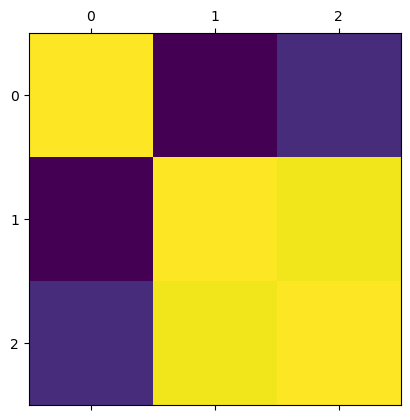

In [10]:
#Create a correlation heatmap using qualitative variables and matplotlib
plt.matshow(df_clean.corr())
plt.show()

In [11]:
#Create subset of dataframe to include only float variables for correlation
df_filter = df_clean.select_dtypes(include="float64")

In [12]:
#Above error is eliminated after filtering out the non-numeric variables
df_filter.corr()

,Estimated Loss,Total Assets,Total Deposits
Estimated Loss,1.000000,0.470933,0.537625
Total Assets,0.470933,1.000000,0.988274
Total Deposits,0.537625,0.988274,1.000000


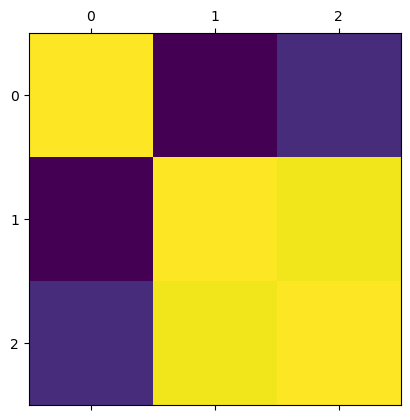

In [13]:
#Create a correlation heatmap using new filtered subset
plt.matshow(df_filter.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

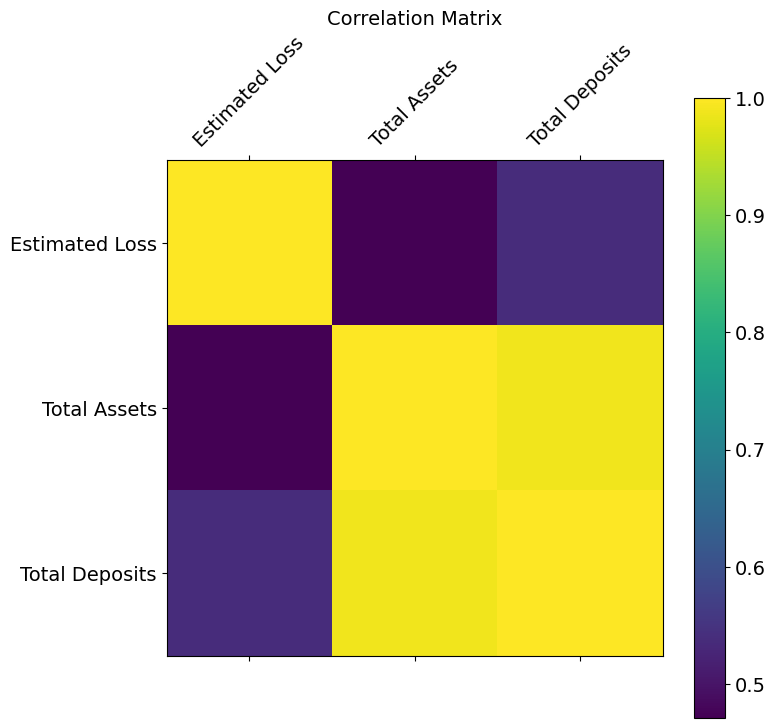

In [14]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_filter.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_filter.shape[1]), df_filter.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_filter.shape[1]), df_filter.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

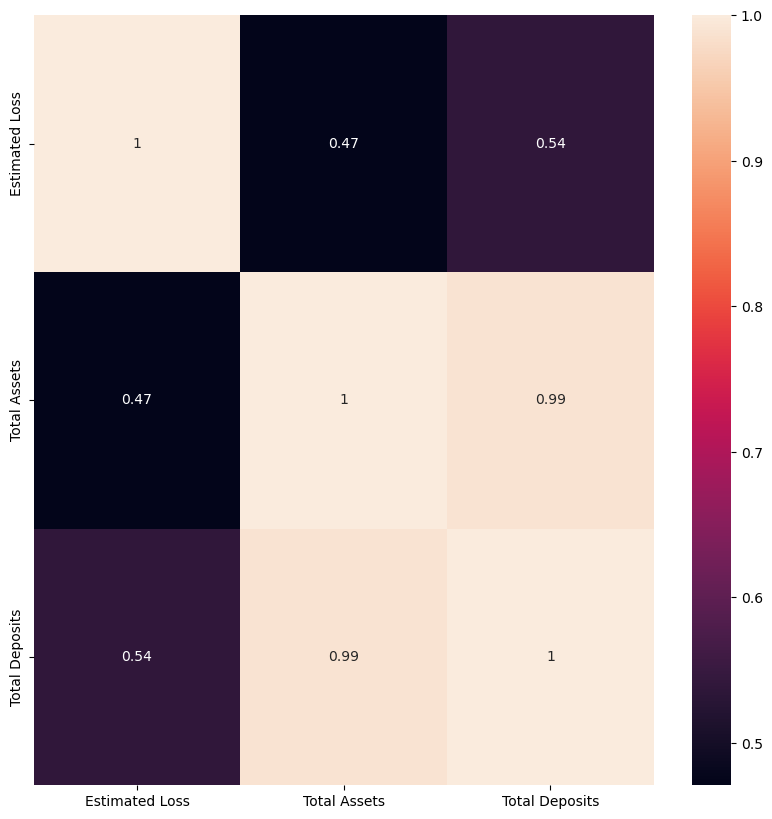

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_filter.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Observations: It would appear that Total Assets and Total Deposits are almost perfectly correlated to one another.  We can also see that both Total Assets and Total Deposits are positively correlated to Estimated Loss.  

### 3b. Scatterplots

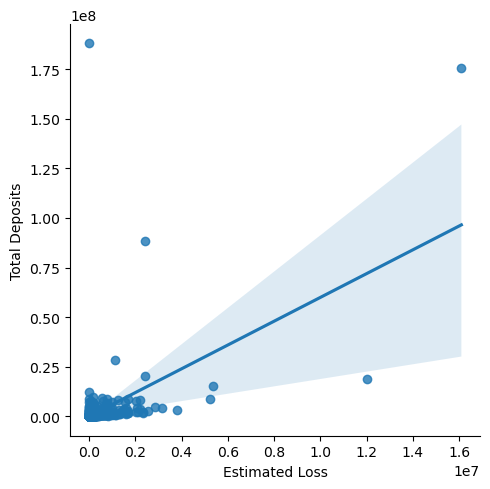

In [16]:
#Create a scatterplot for the "Total Deposits" and "Estimated Loss" columns
sns.lmplot(x = 'Estimated Loss', y = 'Total Deposits', data = df_filter)

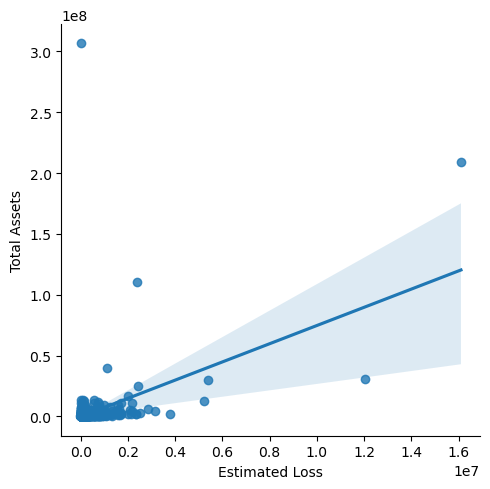

In [17]:
#Create a scatterplot for the "Total Assets" and "Estimated Loss" columns
sns.lmplot(x = 'Estimated Loss', y = 'Total Assets', data = df_filter)

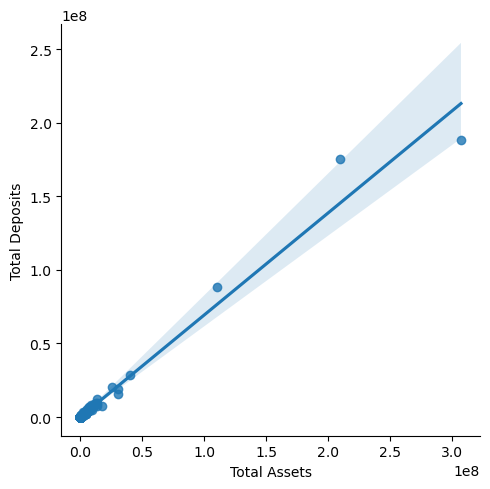

In [18]:
#Create a scatterplot for the "Total Deposits" and "Total Assets" columns
sns.lmplot(x = 'Total Assets', y = 'Total Deposits', data = df_filter)

#### Observations: There is slightly less variation between the Total Assets with Estimated Loss than Total Deposits with Estimated Loss.  There also appears to be about 3-4 outliers where the total Deposits or Total Assets did not reflect what should have been the Estimated loss.  This could be either an error in the data, or if not an error, something that is skewing the results of the graph.  What we can see though is that the vast majority of the data lies in the lower end of both axes.

### 3c. Pair Plots

In [19]:
#Use desired variables in the Pair Plot
df_sub = df_clean[['Estimated Loss', 'Total Assets', 'Total Deposits']]

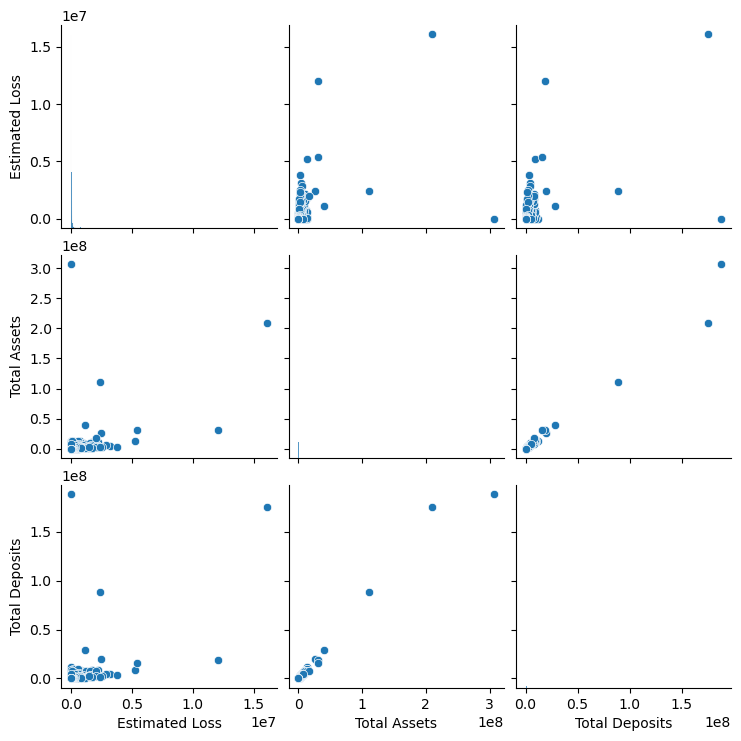

In [20]:
#Create a pair plot using df_sub
g = sns.pairplot(df_sub)

#### Observations: Estimated Loss and Total Assets should be explored further to see if the total losses incurred are directly correlated to total losses.  Would like to see additional data to show what types of assets they had possibly.

### 3d. Categorical Plots

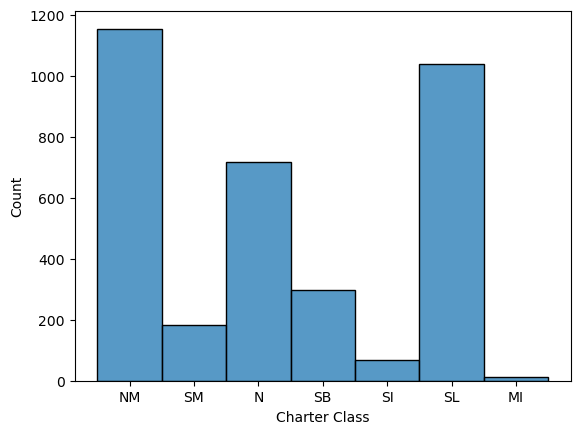

In [21]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" add a line that encompasses the distribution

#Categorical plot of Charter Class
df_hist_CC = sns.histplot(df_clean['Charter Class'], bins = 20)

#### Observations: NM = State Non-Member Banks, SM = State Member Banks, N = National Member Banks, SB = Savings Banks and Savings ad Loans, rest are undefined.  NM has the most banks that have failures, next is SL, which is currently undefined by the FDIC site.  They have defined SA as Savings Association which may include all the undefined ones.

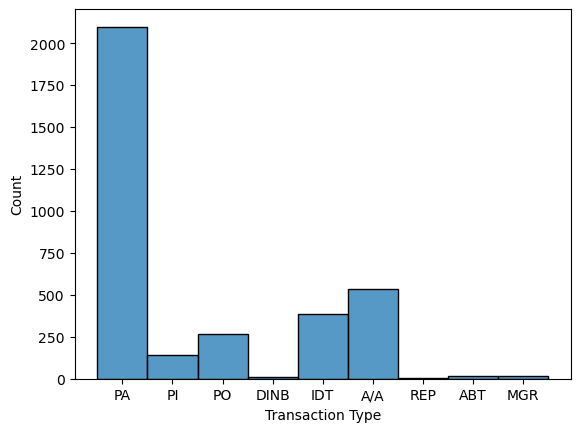

In [22]:
#Categorical plot of Transaction Type
df_hist_trans = sns.histplot(df_clean['Transaction Type'], bins = 20)

#### Observations: PA = Purchase & Assumption, PI = Purchase and Assumption of Insured Deposits only, PO = Payout, IDT = Insured Deposit Transfer, DINB = Deposit Insurance National Bank established by FDIC to facilitate payout, A/A = Assistance Transactions, REP = Re-Privatization, ABT = Asset-backed Transfer, MGR = Management and Generally Provided Assistance by FSLIC.

#### Most transactions were Purchase and Assumption

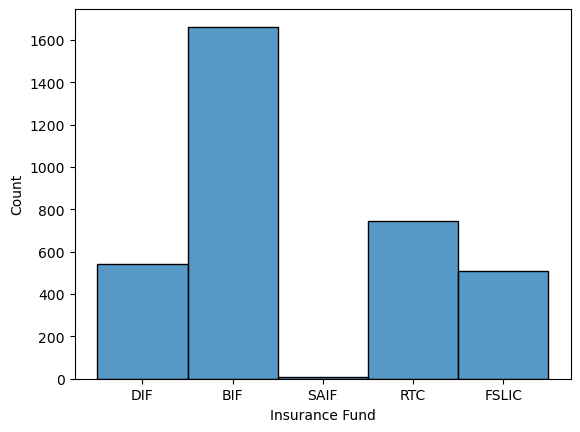

In [23]:
#Categorical plot of Insurance Fund
df_hist_insurance = sns.histplot(df_clean['Insurance Fund'], bins = 20)

#### Observations: DIF = Deposit Insurance Fund, BIF = Bank Insurance Fund, SAIF = Savings Association Insurance Fund, RTC = Resolution Trust Corp, FSLIC = Federal Savings and Loan Insurance Corp

#### Most were BIF

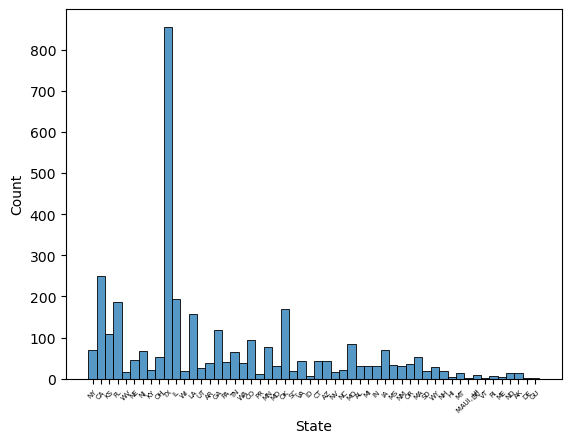

In [24]:
#Categorical plot of State
df_hist_state = sns.histplot(df_clean['State'], bins = 20)
plt.xticks(fontsize = 5, rotation=45)
plt.show()

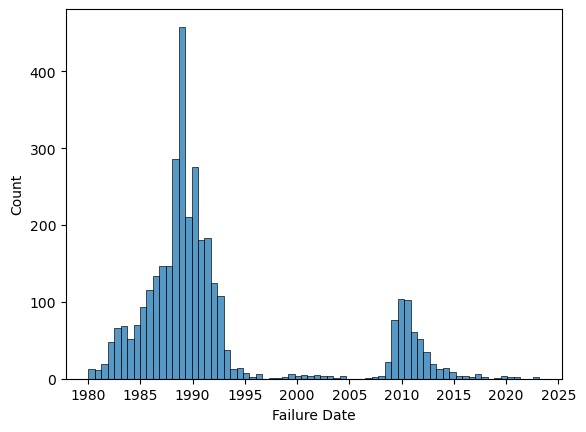

In [25]:
#Categorical plot of Failure Date
df_hist_date = sns.histplot(df_clean['Failure Date'], bins = 70)

#### Observations: For some reason, the plot only goes back as far as 1980, when it should go back to 1934.  Huge spikes in late 80's to early 90's.  Another spike in around 2008 to early 2010's.

## 4. Questions and Hypotheses

#### Q1:  What was the commonality or event that occured in the spikes on the timeline in the 80's to 90's and early 2000's?

#### Q2a: Why did the one state have so many failures?

#### Q2b: What was the average size of the banks in the state that experienced so many failures?

#### Q2c: What charter class did the state with the highest failures was most common?

#### Q2d: When did most of these failures occur in that state?

#### Q3: When did the transactions occur for the PA's and in what states?

#### Q4: What are the outliers for assets/deposits vs Estimated losses and where did they occer?  When?

### Hypothesis: If the Financial Institution is a Non-Member bank, then it is more likely to fail and be purchased by another financial institution at time of failure

## 5. DataSet Wishlist

#### 1. Information about the asset types for the failed banks

#### 2. Total banks per state vs number of failed banks

#### 3. Total assets for each state in a given year in the banks to compare sizes